In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
import os
os.chdir('C:/Users/lsreeram/Downloads/_/GL/05 Predictive Modeling/Week1/01HandsOn')

In [ ]:
cars_df = pd.read_csv('auto-mpg.csv')
cars_df.head(3)

In [ ]:
# let's check column types and number of values
cars_df.info()

Fix: horsepower is object

In [ ]:
cars_df_eda = cars_df.drop(['car name'],axis=1)

### Missing values

In [ ]:
cars_df_eda.isnull().sum()

In [ ]:
cars_df_eda.duplicated().sum()

In [ ]:
cars_df_eda.describe()

In [ ]:
hpIsDigit = pd.DataFrame(cars_df_eda.horsepower.str.isdigit())
cars_df_eda[hpIsDigit['horsepower']==False]

In [ ]:
cars_df_eda[hpIsDigit['horsepower']==False].count()

In [ ]:
cars_df_eda = cars_df_eda.replace("?", np.nan)
cars_df_eda[hpIsDigit["horsepower"] == False]

In [ ]:
# checking column medians
cars_df_eda.median()

In [ ]:
medianFiller = lambda x: x.fillna(x.median())
cars_df_eda = cars_df_eda.apply(medianFiller, axis=0)

In [ ]:
# let's convert the horsepower column from object type to float type
cars_df_eda["horsepower"] = cars_df_eda["horsepower"].astype(float)

In [ ]:
cars_df_eda["origin"] = cars_df_eda["origin"].replace({1: "america", 2: "europe", 3: "asia"})
cars_df_eda.head()

### BIivariate Analysis

In [ ]:
cData_attr = cars_df_eda.iloc[:, 0:7]
sns.pairplot(cData_attr, kind='kde')

In [ ]:
cData_attr = cars_df_eda.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde');

### Dummies

In [ ]:
# drop_first=True will drop one of the three origin columns
cars_df_eda = pd.get_dummies(cars_df_eda, columns=["origin"], drop_first=True)
cars_df_eda.head()

### Split Data

In [ ]:
# independent variables
X = cars_df_eda.drop(["mpg"], axis=1)
# dependent variable
y = cars_df_eda[["mpg"]]

In [ ]:
X=sm.add_constant(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [ ]:
print(X_train.head())

In [ ]:
print(X_test.head())

### Fit Model

In [ ]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [ ]:
# let's print the regression summary
print(olsres.summary())

# Week 4 - CART

### Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.cross_validation import train_test_split

In [2]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

##--conda install pydot
##--conda install -c anaconda graphviz

### Dataset

In [3]:
 os.chdir('C:/Users/lsreeram/Downloads/_/GL/05 Predictive Modeling/Week4/Practice')

In [4]:
iris = pd.read_csv('iris.csv')

In [5]:
iris.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [6]:
iris.drop('Id', axis=1, inplace=True)

In [7]:
iris.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [8]:
#Fix - replace categories

In [9]:
X= iris.drop('Species', axis=1)
y = iris['Species']

### Split Data into train test

In [10]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=123)

## CART decision tree- Normal

In [11]:
dtree = DecisionTreeClassifier(criterion='gini')

In [ ]:
dtree.fit(X_train,y_train)

### Predictions

In [ ]:
dtree_predictions= dtree.predict(X_test)

### Model Evaluation

In [ ]:
print(confusion_matrix(y_test,dtree_predictions))

In [ ]:
print(classification_report(y_test, dtree_predictions))

### Playing

In [ ]:
dtree.predict([[4.9, 2.5, 4.5, 1.7]])

In [ ]:
iris['Species'].value_counts()

### Tree Visualizing

In [ ]:
train_char_label=['Iris-setosa','Iris-versicolor','Iris-virginica']

In [ ]:
list(X_train)

In [ ]:
iris_dot_data_1 = StringIO()
export_graphviz(dtree,out_file= iris_dot_data_1,feature_names=list(X_train), filled=True,class_names=train_char_label)
graph = pydot.graph_from_dot_data(iris_dot_data_1.getvalue())

In [ ]:
Image(graph[0].create_png())

### Model feature Importance

In [ ]:
dtree.feature_importances_

In [ ]:
pd.DataFrame(dtree.feature_importances_, columns=['Imp'], index=X_train.columns)

## Regularized Decision Tree

In [28]:
reg_dtree = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=10,min_samples_split=20)

In [29]:
reg_dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=20)

### Predictions

In [14]:
reg_dtree_predictions = reg_dtree.predict(X_test)

### Model Evaluation

In [16]:
print(confusion_matrix(y_test,reg_dtree_predictions))

[[18  0  0]
 [ 0 10  0]
 [ 0  2 15]]


In [17]:
print(classification_report(y_test, reg_dtree_predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.88      0.94        17

       accuracy                           0.96        45
      macro avg       0.94      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45



### Playing

In [30]:
reg_dtree.predict([[4.9, 2.5, 4.5, 1.7]])

C:\Users\lsreeram\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)

### Tree Visualizing

In [20]:
train_char_label=['Iris-setosa','Iris-versicolor','Iris-virginica']

In [21]:
list(X_train)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [22]:
iris_dot_data_1 = StringIO()
export_graphviz(reg_dtree,out_file= iris_dot_data_1,feature_names=list(X_train), filled=True,class_names=train_char_label)
graph = pydot.graph_from_dot_data(iris_dot_data_1.getvalue())

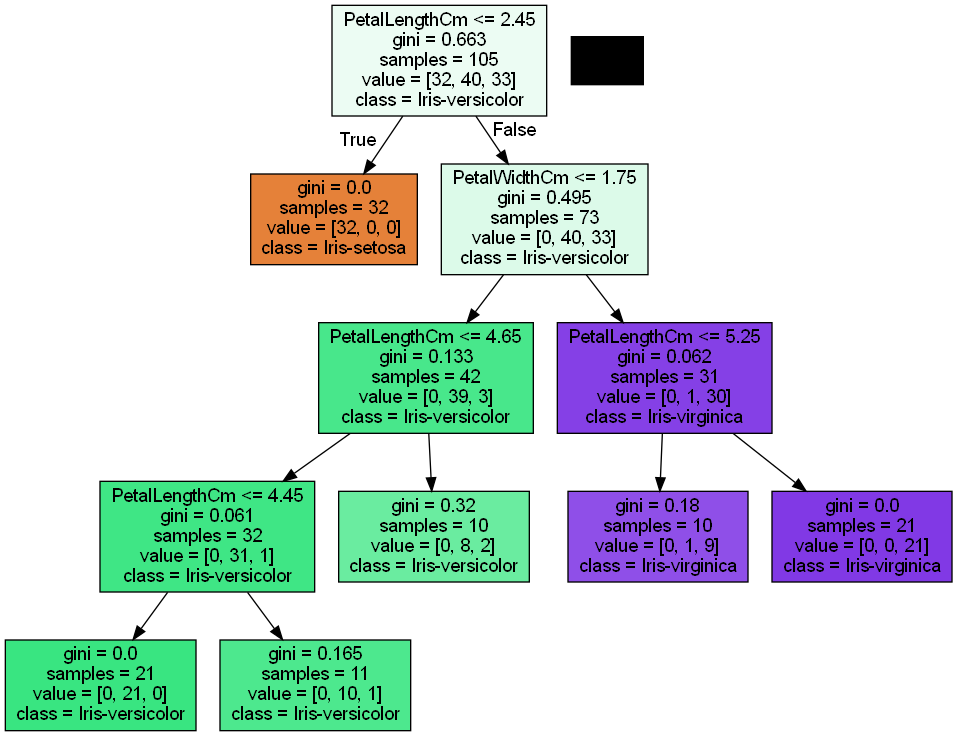

In [23]:
Image(graph[0].create_png())

### Regularized Model feature Importance

In [24]:
reg_dtree.feature_importances_

array([0.        , 0.        , 0.54381549, 0.45618451])

In [25]:
pd.DataFrame(reg_dtree.feature_importances_, columns=['Imp'], index=X_train.columns)

,Imp
SepalLengthCm,0.000000
SepalWidthCm,0.000000
PetalLengthCm,0.543815
PetalWidthCm,0.456185


### Probabilities

In [26]:
ytrain_predict = reg_dtree.predict(X_train)
ytest_predict = reg_dtree.predict(X_test)

In [27]:
ytrain_predict_prob = reg_dtree.predict_proba(X_train)
ytest_predict_prob = reg_dtree.predict_proba(X_test)